<a href="https://colab.research.google.com/github/emuccino/flexgan/blob/master/flexgan_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install flexgan

import flexgan as flex
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from tensorflow.keras.datasets import boston_housing

In [2]:
#@title
def plot(original_df, synthetic_df):
    from scipy.special import comb
    from itertools import combinations
    
    combs = list(combinations(original_df.columns,2))
    n_plots = len(combs)

    plt.figure()
    fig, axs = plt.subplots(n_plots,2)
    fig.set_figheight(4*n_plots)
    fig.set_figwidth(10)
    axs[0][0].set_title('Real')
    axs[0][1].set_title('Synthetic')

    for col, df in enumerate([original_df, synthetic_df]):
        for row, (d0, d1) in enumerate(combs):
            axs[row][col].scatter(df[d0], df[d1], s=10)
            axs[row][col].set_xlabel(f'Feature {d0}')
            axs[row][col].set_ylabel(f'Feature {d1}')

    plt.show()

    return

In [3]:
#load data

(train_x, train_y), _ = boston_housing.load_data()

#setup dataframe

original_df = pd.DataFrame(np.hstack([train_x, train_y.reshape(-1,1)]))

original_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20,19.4
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59,25.2
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79,19.4


In [4]:
#initialize the data generator

my_generator = flex.generator(original_df)

In [5]:
#train the data generator

my_generator.train()

In [6]:
#generate data

synthetic_df = my_generator.generate_data()

<Figure size 432x288 with 0 Axes>

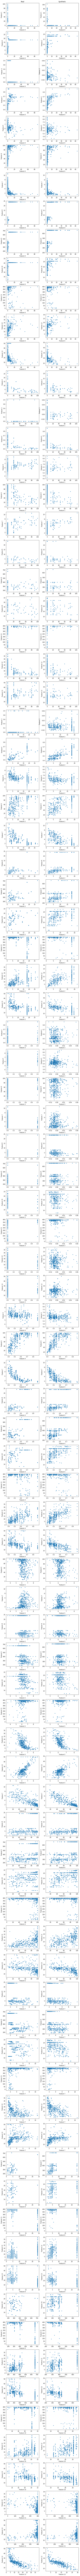

In [7]:
#compare synthetic data with original

plot(original_df, synthetic_df)